In [31]:
# Importing necessary libraries and importing the sample dataset
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("headbrain.csv")
data.head(), data.shape

(   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
 0       1          1             4512                 1530
 1       1          1             3738                 1297
 2       1          1             4261                 1335
 3       1          1             3777                 1282
 4       1          1             4177                 1590,
 (237, 4))

In [34]:
# Plotting a Linear Regression between Head Size(Independent Variable) and Brain Weight(Dependent Variable)
# y = mx + c (or) y= b1x + b0
# b1 = sum(x - mean(x)) * (y - mean(y)) / (x - mean(x)) ^ 2
# b0 = (mean(y) - b1 * mean(x) 

X = data["Head Size(cm^3)"]
Y = data["Brain Weight(grams)"]
mean_X = X.mean()
mean_Y = Y.mean()

b1_num, b1_den = 0,0

for i in range(len(X)):
    b1_num += (X[i] - mean_X) * (Y[i] - mean_Y)
    b1_den += (X[i] - mean_X) ** 2 
    
b1 = b1_num / b1_den
b0 = mean_Y - (b1 * mean_X)

# m, c values
b1, b0

(0.26342933948939945, 325.57342104944223)

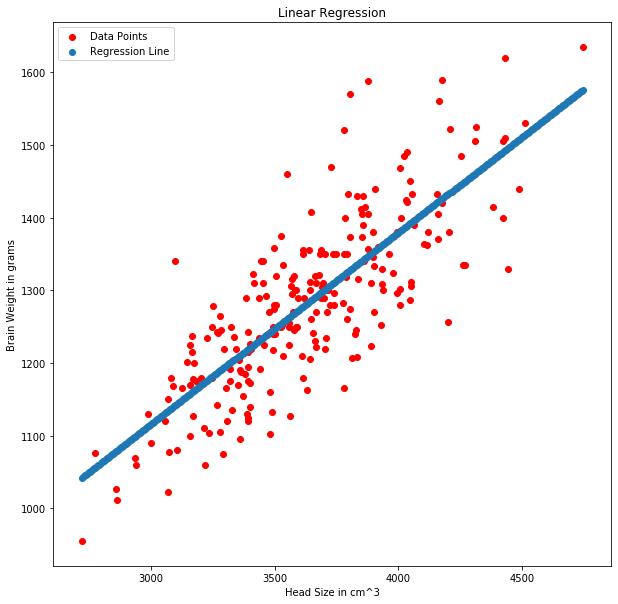

In [39]:
# Creating Regression Line Equation
x = np.linspace(min(X), max(X), 500)
y = (b1 * x) + b0

ax, fig = plt.subplots(figsize=(10,10))

# Plotting Data points from the dataset
plt.scatter(X,Y, c="red", label="Data Points")

# Plotting Regression Line
plt.scatter(x,y, label="Regression Line")

plt.title("Linear Regression")
plt.xlabel("Head Size in cm^3")
plt.ylabel("Brain Weight in grams")
plt.legend()

In [41]:
# Check how well the Regression equation fits the dataset. In other words, checking the efficiency of the Linear Regression model
# Finding R2 square value
# SSres = sum((actual_Y - predicted_y) ** 2)
# SStot = sum((actual_Y - mean_Y) ** 2)
# R2 = 1 - (SSres / SStot)

SSres = 0
SStot = 0
for i in range(len(X)):
    pred_y = (b1 * X[i]) + b0
    SSres += (Y[i] - pred_y) ** 2
    SStot += (Y[i] - mean_Y) ** 2

# Calculating R2(R-Squared) value
R2 = 1 - (SSres / SStot)
R2

0.6393117199570003

R2 Value = 0.63

In [55]:
# Implementing with ikit-learn library and verifying the r2 value
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data["Head Size(cm^3)"]
Y = data["Brain Weight(grams)"]

# Reshpaing X so that it can be used in the Linear Regression Model
X =  X.values.reshape((len(X), 1))

len(X), len(Y)

# Instantiating the model
model = LinearRegression()

# Fitting the model
model = model.fit(X, Y)

# Find predictions
y_preds = model.predict(X)

# Check r-squared value
r2_score = model.score(X, Y)

print(r2_score)

0.639311719957


Getting the same value 0.639311719957 as r-square score using scikit learn library